# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** From the moment that the goal of the model is to predict which students belong to two possible groups, those who are likely to suffer intervention, and those who do not need any action to achieve gradution we know that the model should be based on **classification**. Where the model will determine which group belong to each new student. We can justify our response as soon as we understand that the goal is the separation of data into two groups, so the model output must have a discrete value (group 1 or group 2) only achieved with classification. If that were the case to predict the score of the students based on the features we have, the model would have to return continuos data with the pontuation, something that is typical for models that use regression.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [12]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
n_passed = student_data.passed.value_counts()['yes']

# TODO: Calculate failing students
n_failed = student_data.passed.value_counts()['no']

# TODO: Calculate graduation rate
grad_rate = 100* float(n_passed) / n_students 

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


In [13]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [14]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [42]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train = None
X_test = None
y_train = None
y_test = None

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, test_size=0.24, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: ** The models chosen that I found suitable for the problem were: Support Vector Machines (SVM), Decision Trees(DT) and Naive Bayes (NB). The choice of models was based on the success of these algorithms in studies in the scientific literature as being trustworthy for classification problems. As the data set provided to the problem is not a large sample (only 395 individuals) I tried to choose methods that work well with small data sets but have good performance. We can do a little evaluation of each model as follows:

**1) Support Vector Machines  **

 - General Applications: The SVM is a supervised learning model that generates input-output functions for mapping a set of data that its function can be either a classification function or a regression function. In classification problems, non-linear kernel functions are often used to transform the input data to a high-dimensional space characteristic in which the input data become separable compared with the original input space creating maximum hyperplane margin.
        
 - Strengths: Some of its advantages are that SVM is very effective in high-dimensional spaces, and in situations when have a non-linear separation problem. With SVM we have the possibility to apply new kernels that allows flexibility for our decision boundaries, leading to a better classification performance.
 
 - Weaknesses: It does not have good performance when we have heterogenous datasets and many independent features, and datasets with a lot of data. 
 
 
 **2) Decision Trees  **

 - General Applications: A decision tree is a supervised learning model supported by a decision-making method that is a graphical representation of alternatives available from an initial decision.
 
 - Strengths: Some of its advantages are the solid performance in very large databases, it is a model of easy interpretation and follows philosophy white box indicating the transparency from its boolean decision profile. Other great advantage of a decision trees is the possibility of decomposition of a complex problem in several simpler sub-problems. Recursively, a new identified sub-problems can again broken down into even simpler sub-problems.
 
 - Weaknesses: It has disadvantages as the formation, complexity and size of its trees, which compromises the generalization of the model and can cause overfitting.
 
 
 **3) Naive Bayes  **

 - General Applications: The Naive Bayes model calculates the probability that an unknown sample belongs to one of the possible classes submitted by the problem, or predict your most likely class. We can consider this model as being  completely based on probabilistic calculation. It is  called "naive", considering that the effect of the value of a feature on a given class is independent of the values of other other features.
 
 - Strengths: Between some of its advantages is that with a conditional independence assumption a Naive Bayes classifier can converge quicker than discriminative models having a reduced need of a large set of training data.
 
 - Weaknesses: The same conditional independence assumption can be a disadvantage when if you have no occurrences of a class label and a feature value together, what will give you a zero frequency-based value probability that affects any posterior probability estimate.
 

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [43]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [44]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = SVC(random_state=0)
clf_C = GaussianNB()

# TODO: Set up the training set sizes
X_train_100 = X_train.sample(n=100)
y_train_100 = y_train.sample(n=100)

X_train_200 = X_train.sample(n=200)
y_train_200 = y_train.sample(n=200)

X_train_300 = X_train.sample(n=300)
y_train_300 = y_train.sample(n=300)

for clf in [clf_A, clf_B, clf_C]:

    # show the estimator type
    print "\n{}: \n".format(clf.__class__.__name__)

    # loop thru training sizes
    for n in [100, 200, 300]:

        # TODO: generate training data by taking the first 100 points of X_train, then the first 200, then all 300 points
        train_predict(clf,  X_train.sample(n=n), y_train.sample(n=n), X_test, y_test)


DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0017 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6891.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0015 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.5667.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6935.

SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0015 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 0.8201.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.7376.
Training a SVC u

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Decision Tree** 

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0005 seconds   |       0.0002 seconds   |      1.0000      |   0.6891        |          
| 200               |        0.0004 seconds   |       0.0002 seconds   |      1.0000      |   0.5667        |
| 300               |        0.0002 seconds   |       0.0002 seconds   |      1.0000      |   0.6935        |

** Classifer 2 - Support Vector Machines (SVM)**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0008 seconds     |       0.0007 seconds   |      0.8201      |    0.7376       |
| 200               |      0.0023 seconds     |       0.0012 seconds   |      0.8037      |    0.8077       |
| 300               |      0.0050 seconds     |       0.0024 seconds   |      0.8428      |    0.7815       |

** Classifer 3 - Naive Bayes (Gaussian)**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0003 seconds     |      0.0003 seconds    |      0.5169      |     0.4783      |
| 200               |      0.0004 seconds     |      0.0003 seconds    |      0.6800      |     0.6167      |
| 300               |      0.0004 seconds     |      0.0003 seconds    |      0.7006      |     0.5424      | 

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
  
   As we can see from the results of the three models evaluated, and from the mean of their metrics results, for the F1 score and performance, shown in **Table 1**, the method that had the highest prediction rate on the test set was the Support Vector Machines with an average F1 score of (0.7756) when compared with the average of the other two candidate models Decision Trees (0.6497) and Naive Bayes (0.5458).
   Despite presenting a bit slower training and prediction performance if compared to the other methods, we can choose the SVM as the best model for this case, even because the SVM model compensates its slower performance (something that may later be re-evaluated with a better selection of features used in the model. A reassessment of the features can reduce their number to only those features that are really important to the prediction process.Thus increasing it's performance) with a more satisfactory prediction rate even when we have a set of small training data as can be seen from the result of prediction rates for 100 individuals data sample: SVM (0.7376), NB (0.4783) and DT (0.6891). Revealing that the SVM is also a better choice for when we have a scenario of a limited number of available data.
  
     
   ** Table 1 - Metrics means for each model **

| Model             | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| Decision Tree     |        0.0004 seconds   |       0.0002 seconds   |      1.0000      |   0.6497        |
| SVM               |        0.0027 seconds   |       0.0014 seconds   |      0.8222      |   0.7756        |
| Naive Baeys       |        0.0003 seconds   |       0.0003 seconds   |      0.6325      |   0.5458        |

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **
The model chosen to classify students likely to suffer intervention or not, was the Support Vector Machines. The model uses data from former students (age, gender, family, etc.) to make predictions with the new students' data. These data must be processed previously, to eliminate any occurrence that may decrease the effectiveness of the model (missing data, for example). After the selected data, the model will undergo a training process with the data of former students so that the model can create a function able to set a decision boundary (**Figure 1**) between a set of students who failed and those who managed to graduate.We call this function of separation between the two classes, a hyperplane, which is nothing more than a function that can take different shapes within a n-dimensional space to separate them in the best possible way. If the data is very "mixed" and do not have a very clear separation, the SVM can use a trick (called Kernel Trick) to put our data into a higher dimensional space so that we can divide them better. After establish a function that separates well our classes for the model, it's time to introduce the model to the new data from the newly arrived students. So the model will be able to tell us (predict) which students need intervention or not.

Figure 1.Decision boundary representation.


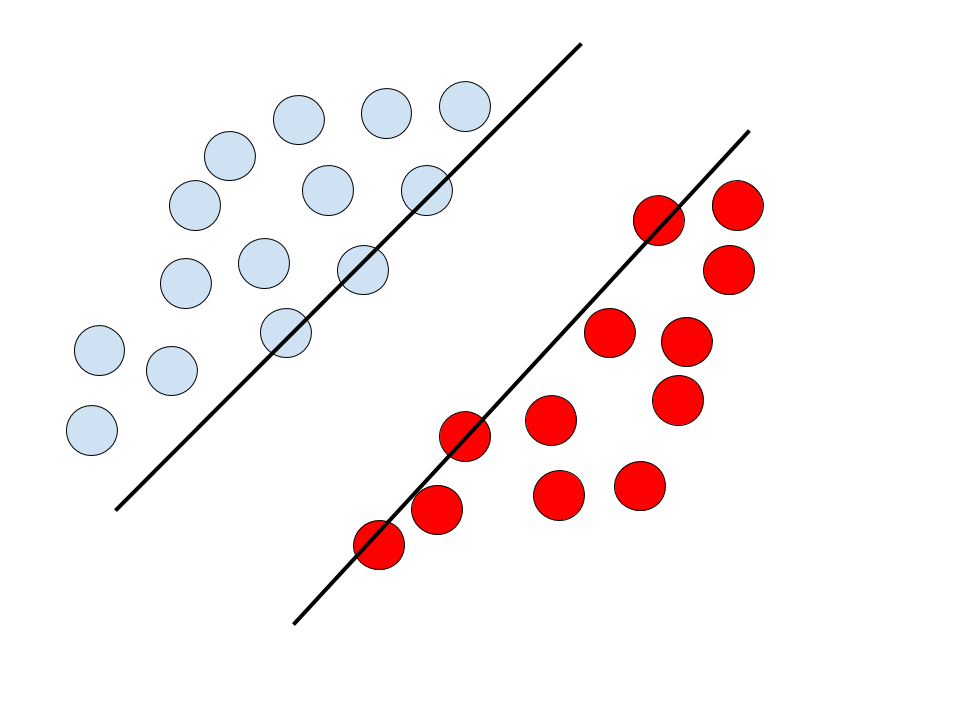

In [56]:
from IPython.display import Image
print "Figure 1.Decision boundary representation." 
Image("img/Boundary.png")

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [47]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn import grid_search
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer

normer = Normalizer()
X_train = normer.fit_transform(X_train)
X_test = normer.transform(X_test)

C_range = np.logspace(-2, 8, 11)
gamma_range = np.logspace(-7, 3, 11)

# TODO: Create the parameters list you wish to tune
parameters = dict(gamma=gamma_range, C=C_range)

# TODO: Initialize the classifier
clf = SVC(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer, n_jobs=4)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print grid_obj.best_estimator_


# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)
Made predictions in 0.0037 seconds.
Tuned model has a training F1 score of 0.8330.
Made predictions in 0.0011 seconds.
Tuned model has a testing F1 score of 0.7945.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** 

According to **Table 2**, the results for the F1 score for the model were tuned to 0.8330 for the training set and 0.7945 for the test set. A gain of approximately 1.0% in the prediction rate. The parameters chosen to be tuned were gamma, C value and the kernel with the intention of reducing the threat of overfitting. The ideal values for this process for each parameter was gamma=0.10000000000000001, C = C=100.0 and the kernel='rbf'. 


** Table 2 - Tuned and Untuned Model Comparison **

| Training Set Size       | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :----------------:      | :---------------------: | :--------------------: | :--------------: | :-------------: |
| not tuned               |      0.0050 seconds     |       0.0024 seconds   |      0.8424      |    0.7815       |
| with tuned parameters   |      0.0037 seconds     |       0.0011 seconds   |      **0.8330**  |    **0.7945**   |

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.